The database is loaded from UCI repository. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

The analysis determined the quantities of 13 constituents found in each of the three types of wines.

All attributes are continuous. The information about the data says to standardise the variables for certain uses. There are no missing attributes as well

The Wine dataset consists of 3 different classes where each row correspond to a particular wine sample. The class labels (1, 2, 3) are listed in the first column, and the columns 2-14 correspond to the following 13 attributes (features):

    Alcohol
    Malic acid
    Ash
    Alcalinity of ash
    Magnesium
    Total phenols
    Flavanoids
    Nonflavanoid phenols
    Proanthocyanins
    Color intensity
    Hue
    OD280/OD315 of diluted wines
    Proline

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets


In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
df.columns = ["Class", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]

In [5]:
df.head()

,Class,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [6]:
df.shape

(177, 14)

# Pair Plot

/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda2/lib/python2.

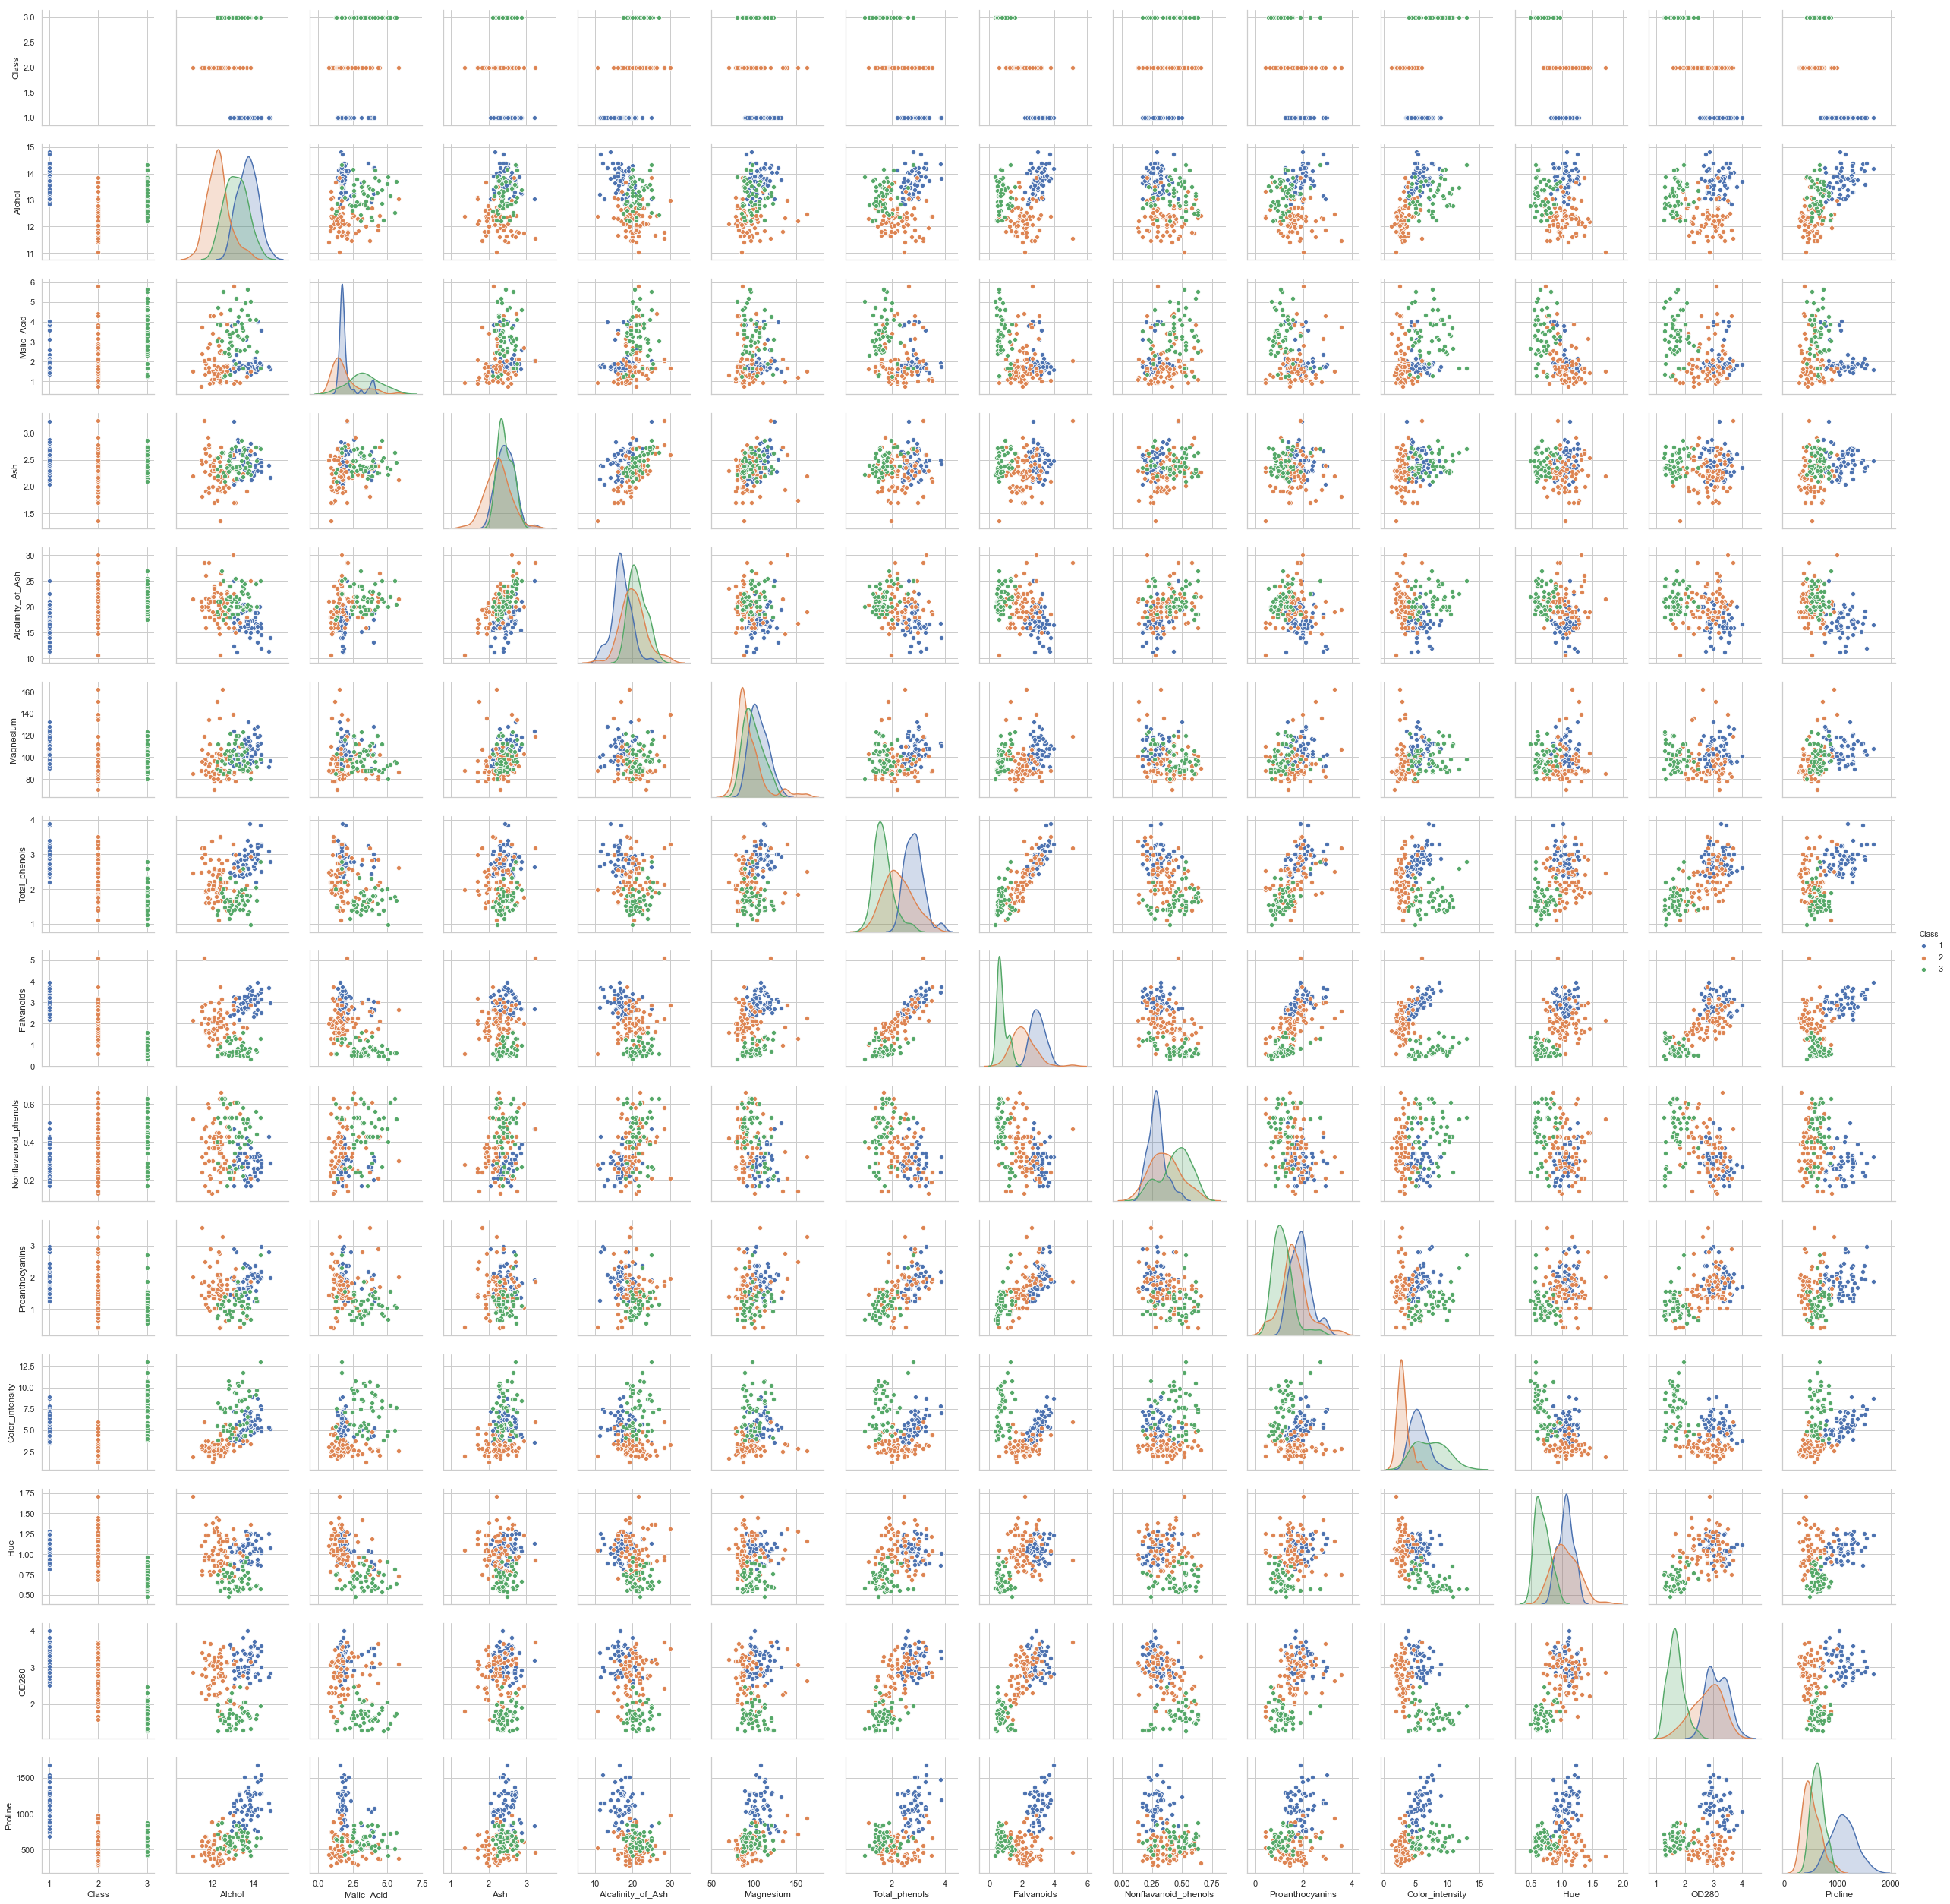

In [7]:
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, hue="Class", size=2.5)

From the above pair plot, there is a **linear relationship** between the **"Total phenols"** and **"Flavanoids"** 

**"Ash"** and **"Alcalinity of Ash"** are normally distributed. 

The correlation between other attributes does not follow linearity.

In [8]:
X = df.drop('Class', 1)
y = df['Class']

In [9]:
print('Class 1 label count: {}'.format(list(y).count(1)),'Frequency: {:.2%}'.format(list(y).count(1)/y.shape[0]))
print('Class 2 label count: {}'.format(list(y).count(2)),'Frequency: {:.2%}'.format(list(y).count(2)/y.shape[0]))
print('Class 3 label count: {}'.format(list(y).count(3)),'Frequency: {:.2%}'.format(list(y).count(3)/y.shape[0]))

('Class 1 label count: 58', 'Frequency: 0.00%')
('Class 2 label count: 71', 'Frequency: 0.00%')
('Class 3 label count: 48', 'Frequency: 0.00%')


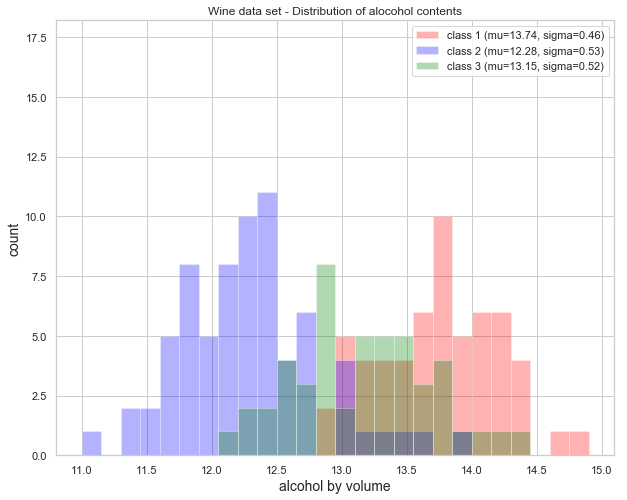

In [10]:
from math import floor, ceil

plt.figure(figsize=(10,8))

# bin width of the histogram in steps of 0.15
bins = np.arange(floor(min(X.iloc[:,0])), ceil(max(X.iloc[:,0])), 0.15)

# get the max count for a particular bin for all classes combined
max_bin = max(np.histogram(X.iloc[:,0], bins=bins)[0])

# the order of the colors for each histogram
colors = ('red', 'blue', 'green')

for label,color in zip(range(1,4), colors):

    mean = np.mean(X.iloc[:,0][y == label]) # class sample mean
    stdev = np.std(X.iloc[:,0][y == label]) # class standard deviation
    plt.hist(X.iloc[:,0][y == label],
             bins=bins,
             alpha=0.3, # opacity level
             label='class {} (mu={:.2f}, sigma={:.2f})'.format(label, mean, stdev),
             color=color)

plt.ylim([0, max_bin*1.3])
plt.title('Wine data set - Distribution of alocohol contents')
plt.xlabel('alcohol by volume', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

# Observation : Class 1 has the highest alcohol content

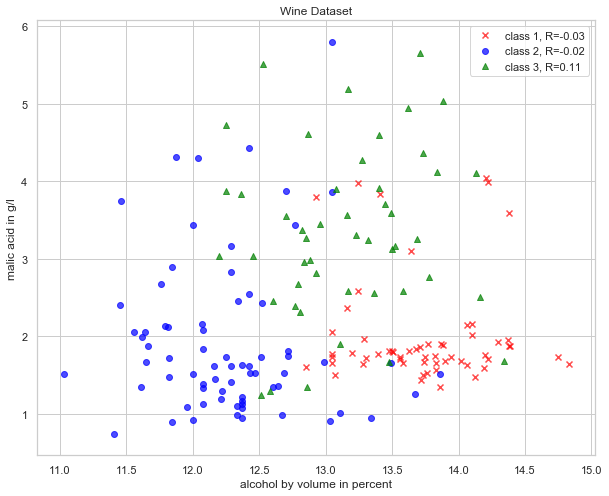

In [11]:
from scipy.stats import pearsonr

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('red', 'blue', 'green')):

    # Calculate Pearson correlation coefficient
    R = pearsonr(X.iloc[:,0][y == label], X.iloc[:,1][y == label])
    plt.scatter(x=X.iloc[:,0][y == label], # x-axis: feat. from col. 1
                y=X.iloc[:,1][y == label], # y-axis: feat. from col. 2
                marker=marker, # data point symbol for the scatter plot
                color=color,
                alpha=0.7,
                label='class {:}, R={:.2f}'.format(label, R[0]) # label for the legend
                )

plt.title('Wine Dataset')
plt.xlabel('alcohol by volume in percent')
plt.ylabel('malic acid in g/l')
plt.legend(loc='upper right')

plt.show()


The above scatter plot shows correlation between alcohol volume and malic acid. 
(We used Pearson correlation coefficient). The graph tells class 3 wine are high in malic acid and also another 
interesting story that class 1 have an outlier. Also the graph shows weak linear relationship between the variables

We will standardize the features so that they are centered around 0 with a standard deviation of 1.

In our “wine data” example, where the alcohol content is measured in volume percent, and the malic acid content in g/l.

In [12]:
X = df.drop('Class', 1)
y = df['Class']

In [13]:
X_std = StandardScaler().fit_transform(X)

In [14]:
#Obtain covariance matrix for X (note columns are the features),  each column represents a variable, while the rows
# contain observations.
cov_matrix = np.cov(X_std,rowvar=False)

In [15]:
# Note that covariance matrix is 13x13 since their are 13 features
print('Covariance matrix of X: \n%s' %cov_matrix[0::5])

Covariance matrix of X: 
[[ 1.00568182  0.10053095  0.21216306 -0.30507344  0.26021246  0.28615975
   0.23144084 -0.15230593  0.12828549  0.5509959  -0.07580325  0.05774296
   0.64471003]
 [ 0.28615975 -0.33540671  0.12890384 -0.31938703  0.20938338  1.00568182
   0.86895489 -0.45084767  0.61400166 -0.05672183  0.43544754  0.7035412
   0.49865642]
 [-0.07580325 -0.56404063 -0.07560818 -0.27426812  0.05233807  0.43544754
   0.54629393 -0.26319569  0.29606963 -0.52558486  1.00568182  0.57061911
   0.23621383]]


In [ ]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [18]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.13788809 -0.48583464 -0.20877489  0.26989127 -0.0011407  -0.21141036
  -0.05751996  0.40108372  0.01378744  0.24221102  0.48825288  0.27224545
   0.21974133]
 [ 0.24638109 -0.22157478  0.09019328 -0.06287575  0.53313643 -0.53070694
   0.43373015  0.06288444  0.02646079 -0.11060787 -0.05064287 -0.11946877
  -0.30063337]
 [ 0.0043183  -0.31528188  0.62374304  0.16036596 -0.20534831 -0.15511547
  -0.14513486 -0.17143391 -0.14187527  0.04222    -0.31451537  0.48509813
  -0.11389638]
 [ 0.23737955  0.01214349  0.61379873 -0.06481078  0.0572236   0.09411101
  -0.29042173  0.42777199  0.09233892  0.06666045  0.20002174 -0.46359328
   0.12325409]
 [-0.1350017  -0.30028828  0.13573164 -0.7063438  -0.39169387 -0.0385105
   0.31843019 -0.15196623  0.05515582 -0.07198266  0.27039812 -0.04908458
   0.10540432]
 [-0.39586939 -0.07054905  0.14462048  0.13330889  0.20259928  0.08301569
  -0.02386071 -0.40699033 -0.46358085  0.31844113  0.32109678 -0.3241189
  -0.24699637]
 [-0.4

In [19]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [20]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 35.98307074  55.22435026  66.40381032  73.514919    80.14366319
  85.10403023  89.35004417  92.04803514  94.27249686  96.17102512
  97.90518043  99.20038674 100.        ]


In [21]:
# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 13 x 13 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors[::5])

# eigenvalues is a 13x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues[::5])

Eigenvectors of Cov(X): 
[[-0.13788809 -0.48583464 -0.20877489  0.26989127 -0.0011407  -0.21141036
  -0.05751996  0.40108372  0.01378744  0.24221102  0.48825288  0.27224545
   0.21974133]
 [-0.39586939 -0.07054905  0.14462048  0.13330889  0.20259928  0.08301569
  -0.02386071 -0.40699033 -0.46358085  0.31844113  0.32109678 -0.3241189
  -0.24699637]
 [-0.29956536  0.27405069  0.08255118  0.19528174 -0.41943139 -0.09978898
   0.23722089  0.43444538 -0.08981939 -0.24823168  0.11841077 -0.02587593
  -0.52434047]]

Eigenvalues of Cov(X): 
[4.7043776  0.64851162 0.29082309]


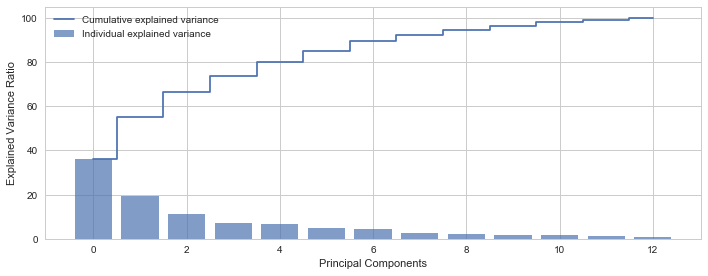

In [22]:
plt.figure(figsize=(10 , 4))
plt.bar(range(13), var_exp, alpha = 0.7, align = 'center', label = 'Individual explained variance')
# an array of variance explained by each eigen vector for the 13 entries
plt.step(range(13), cum_var_exp, where='mid', label = 'Cumulative explained variance')
# an array of cumulative variance. There will be 13 entries with 13th entry cumulative reaching almost 100%
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# The plot shows that the first principal component alone accounts for 40 percent of the variance. 
# Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the data

In [23]:
# Sorting eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort(reverse=True)
print(eig_pairs[:3])

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(4.704377600172434, array([-0.13788809,  0.24638109,  0.0043183 ,  0.23737955, -0.1350017 ,
       -0.39586939, -0.42439422,  0.29913568, -0.31280321,  0.09328558,
       -0.29956536, -0.37720252, -0.28428101])), (2.515578647525732, array([-0.48583464, -0.22157478, -0.31528188,  0.01214349, -0.30028828,
       -0.07054905, -0.00173207, -0.02466918, -0.04144561, -0.52801878,
        0.27405069,  0.16544914, -0.3695384 ])), (1.461587362597121, array([-0.20877489,  0.09019328,  0.62374304,  0.61379873,  0.13573164,
        0.14462048,  0.14931754,  0.16913634,  0.15060183, -0.13608317,
        0.08255118,  0.16681112, -0.12803431]))]
Eigenvalues in descending order: 
[4.704377600172434, 2.515578647525732, 1.461587362597121, 0.9296966527894528, 0.8666329761397853, 0.648511622347476, 0.5551180722779726, 0.35273165988878, 0.2908230917419987, 0.24821099617328551, 0.2267211009629697, 0.16933350672186864, 0.10454034702476421]


The plot shows that the first principal component alone accounts for 40 percent of the variance. Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the data

# Transform dataset onto a new principal axes

In [24]:
#project data into lesser dimensions

In [25]:
p_reduce = np.array(eigvectors_sorted[0:13])

In [26]:
# projecting original data into principal component dimensions
projected_data = np.dot(X_std,p_reduce.T)   

In [27]:
X_std.shape, p_reduce.shape, projected_data.shape

((177, 13), (13, 13), (177, 13))

In [28]:
# converting array to dataframe for pairplot
wine_df = pd.DataFrame(projected_data)

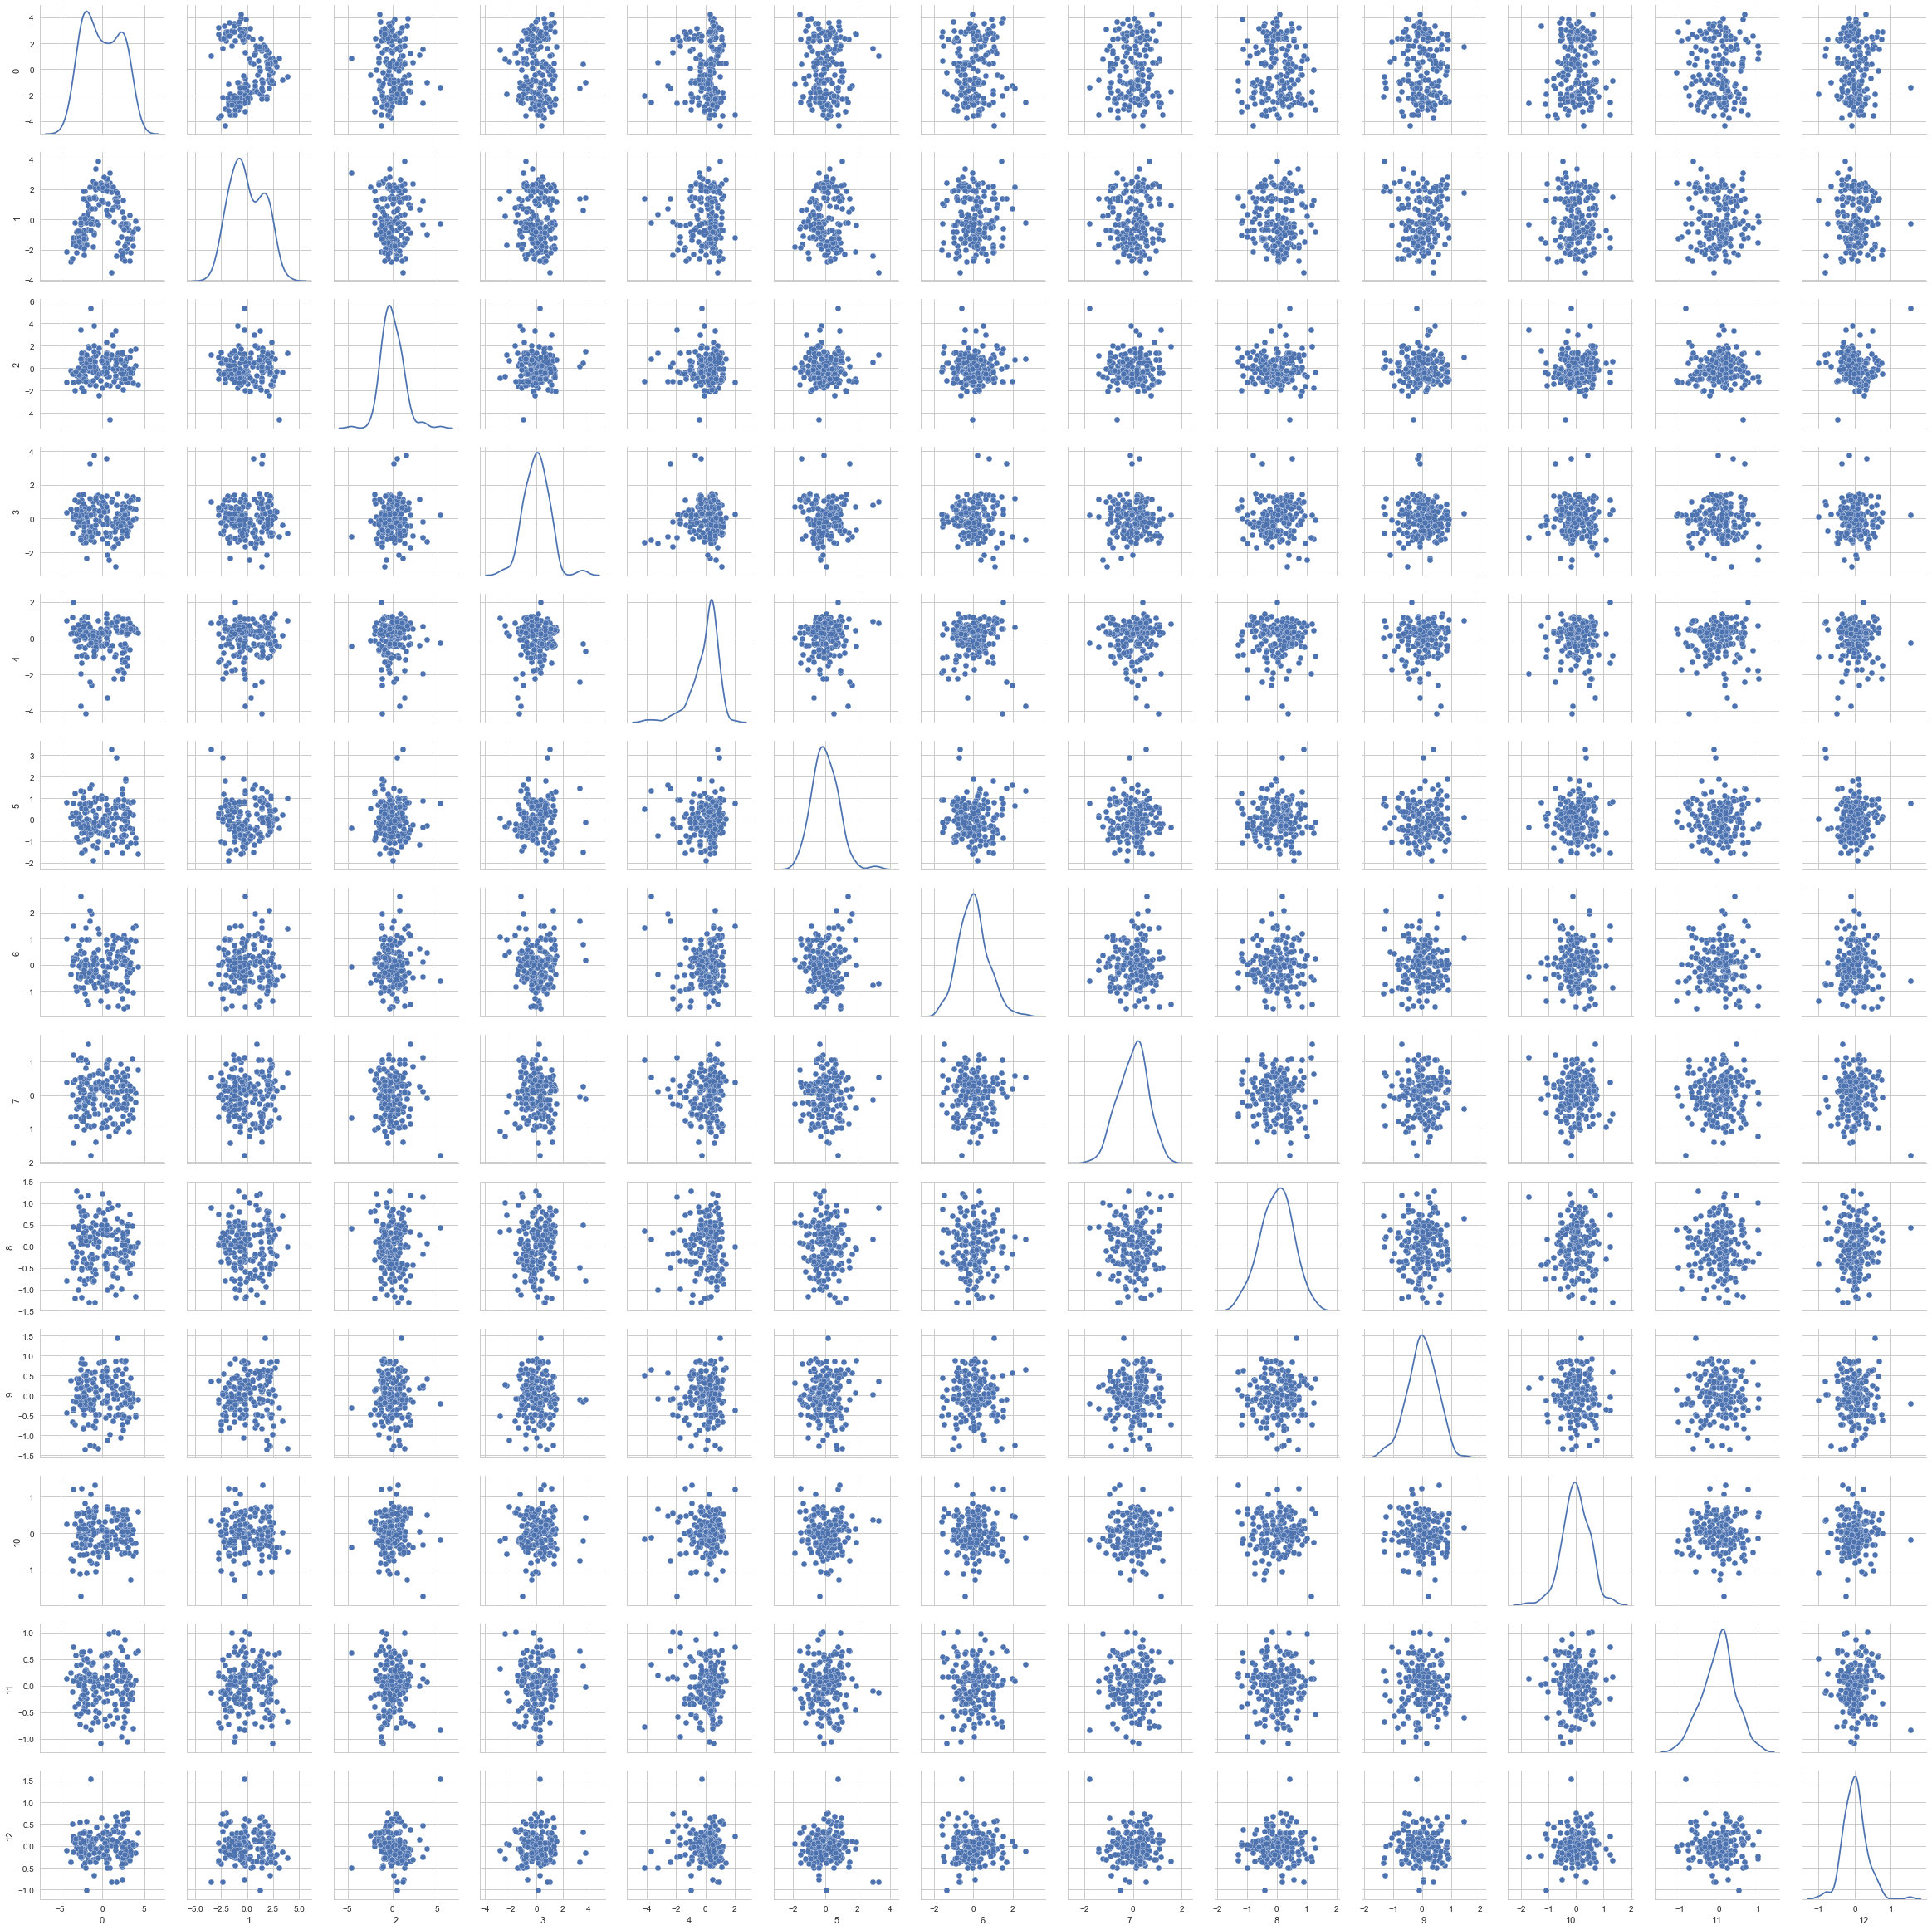

In [29]:
sns.pairplot(wine_df,diag_kind='kde')

# Splitting into train and test set

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=64)

In [31]:
print('Class label frequencies')

print('\nTraining Dataset:')    
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_train).count(l)/y_train.shape[0]))

print('\nTest Dataset:')     
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_test).count(l)/y_test.shape[0]))

Class label frequencies

Training Dataset:
Class 1 samples: 34.96%
Class 2 samples: 37.40%
Class 3 samples: 27.64%

Test Dataset:
Class 1 samples: 27.78%
Class 2 samples: 46.30%
Class 3 samples: 25.93%


In [32]:
from sklearn.linear_model import LogisticRegression

# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.9814814814814815
